In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.Multi_Layer_Network as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff

0.35.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    use_batch_normalization=True,
    initializer=tfe.Initializer.Normal.value,
    init_sd=0.01,
    # initializer=tfe.Initializer.Xavier.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)

Multi Layer Network Model - ID: LCHH5YFL


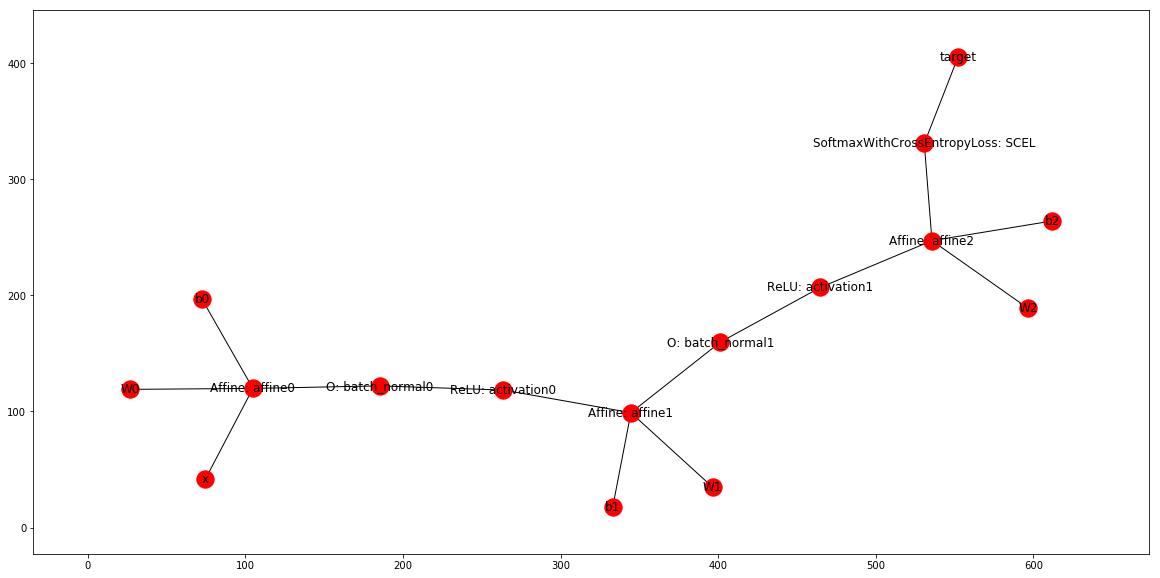

In [3]:
n.draw_and_show(figsize=(20, 10))

In [4]:
data = mnist.MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True)
#data = mnist.Fashion_MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True)

In [5]:
forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
#%timeit -n1 -r1 n.learning(
n.learning(
    max_epoch=5, 
    data=data, 
    batch_size=batch_size, 
    print_period=1, 
    is_numba=True, 
    verbose=False
)
data.reset_kfold()

forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.0958
-- Learning Started --
Epoch   0 Completed - Train Error:2.30267 - Validation Error:2.30265 - Test Accuracy:0.05600 <== Minimal Val. Error
Fold:  0
Epoch   1 Completed - Train Error:2.29553 - Validation Error:2.29417 - Test Accuracy:0.15220 <== Minimal Val. Error
Epoch   2 Completed - Train Error:1.61324 - Validation Error:1.60305 - Test Accuracy:0.71020 <== Minimal Val. Error
Epoch   3 Completed - Train Error:0.49539 - Validation Error:0.47085 - Test Accuracy:0.93300 <== Minimal Val. Error
Epoch   4 Completed - Train Error:0.18332 - Validation Error:0.20089 - Test Accuracy:0.96120 <== Minimal Val. Error
Epoch   5 Completed - Train Error:0.13546 - Validation Error:0.13856 - Test Accuracy:0.96800 <== Minimal Val. Error

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch:  5 (Fold:  0 & Epoch:  5) - Train Error:0.13546 - Validation Error:0.13856 - Test Accuracy:0.96800

Fold:  1
Epoch   1 Completed - Train Error:0.07947 - Validation Error:0.

In [6]:
print("Epoch:{:3d}, Min Train Error:{:7.5f}, Min Validation Error:{:7.5f}, Test Accuracy:{:7.5f}".format(
    n.min_validation_error_epoch,
    n.min_train_error,
    n.min_validation_error,
    n.test_accuracy_at_min_validation_error_epoch
))

print("Mean of Min Va. Error For All Folds:{:7.5f}".format(n.mean_min_validation_error_for_all_folds))

Epoch: 56, Min Train Error:0.00087, Min Validation Error:0.00063, Test Accuracy:0.97760
Mean of Min Va. Error For All Folds:0.02783


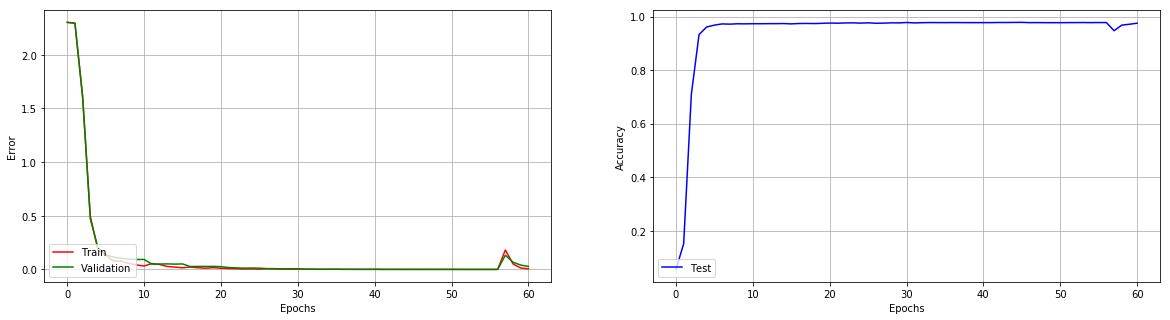

In [7]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 18, Prediction: Five, Ground Truth: Three
False Prediction Index: 115, Prediction: Nine, Ground Truth: Four
False Prediction Index: 124, Prediction: Four, Ground Truth: Seven
False Prediction Index: 149, Prediction: Nine, Ground Truth: Two
False Prediction Index: 247, Prediction: Two, Ground Truth: Four


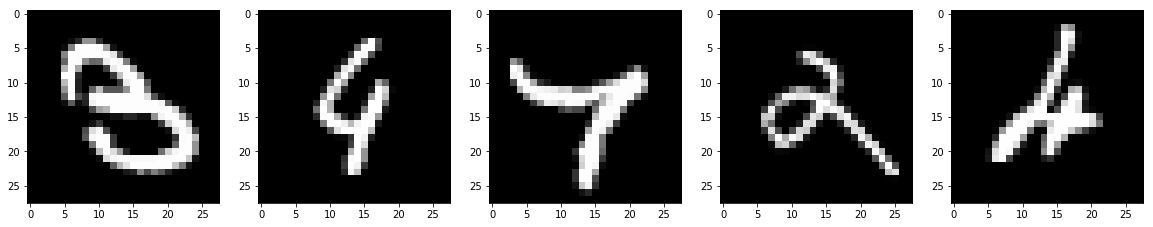

In [8]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

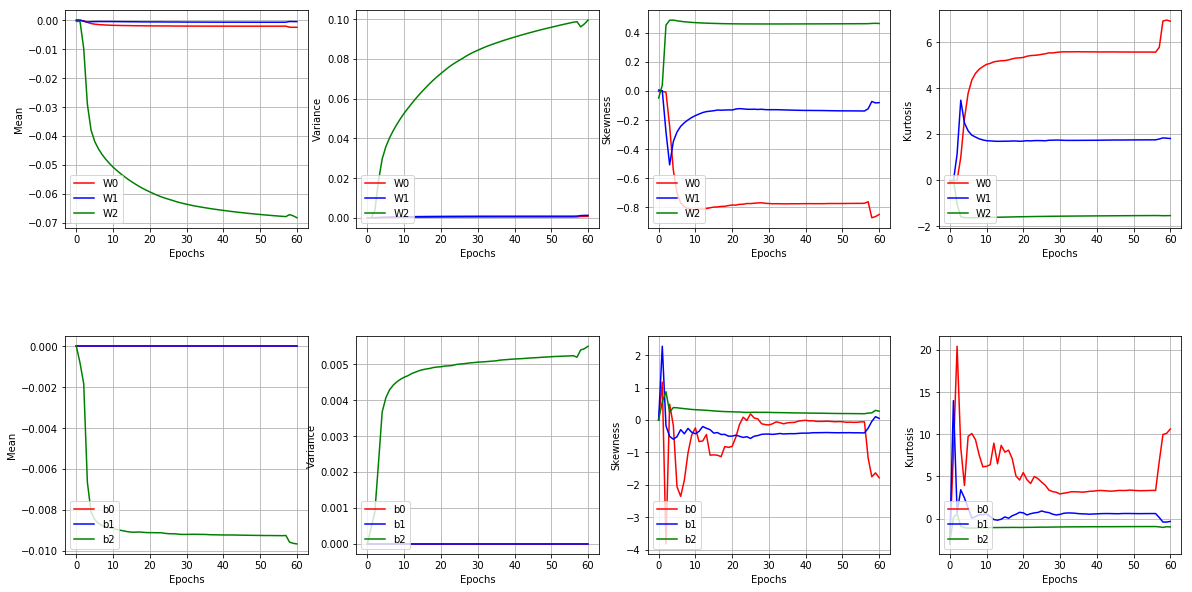

In [9]:
n.draw_param_description(figsize=(20, 10))

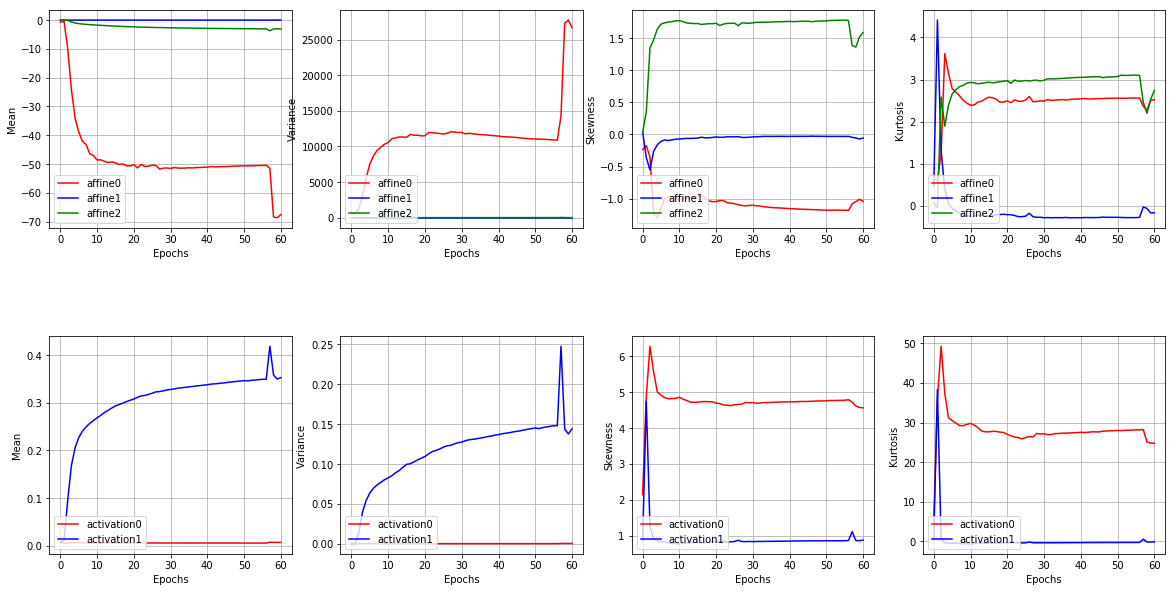

In [10]:
n.draw_output_description(figsize=(20, 10))